In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
cd /work/hp220105o/i25004/hbi/output

/work/02/hp220105o/i25004/hbi/output


Text(0, 0.5, 'Max log10 slip rate (m/s)')

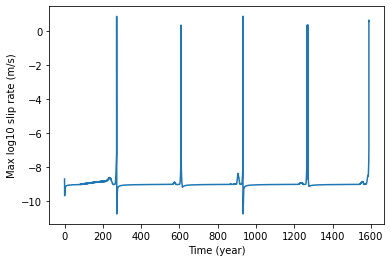

In [50]:
#maximum slip rate vs time 
jobid=0
dd=np.loadtxt('monitor'+str(jobid)+'.dat')
yr=365*24*3600
plt.plot(dd[:,1]/yr,dd[:,2])
plt.xlabel('Time (year)')
plt.ylabel('Max log10 slip rate (m/s)')

Text(0, 0.5, 'Average slip (m)')

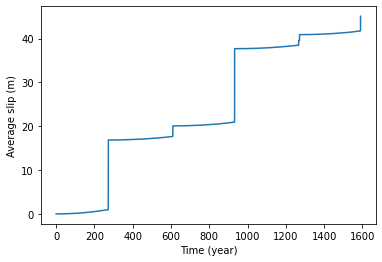

In [51]:
#average slip vs time 
jobid=0
dd=np.loadtxt('monitor'+str(jobid)+'.dat')
yr=365*24*3600
plt.plot(dd[:,1]/yr,dd[:,3])
plt.xlabel('Time (year)')
plt.ylabel('Average slip (m)')

Text(0, 0.5, 'Average friction')

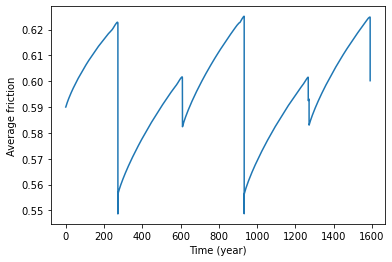

In [52]:
#average friction vs time 
jobid=0
dd=np.loadtxt('monitor'+str(jobid)+'.dat')
yr=365*24*3600
plt.plot(dd[:,1]/yr,dd[:,4])
plt.xlabel('Time (year)')
plt.ylabel('Average friction')

Text(0, 0.5, 'log10 slip rate (m/s)')

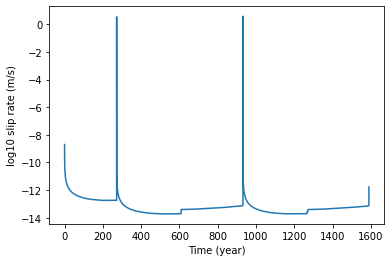

In [55]:
#slip rate vs time at i=500 (loc)
jobid=0
dd=np.loadtxt('local'+str(jobid)+'-500.dat')
yr=365*24*3600
plt.plot(dd[:,1]/yr,dd[:,2])
plt.xlabel('Time (year)')
plt.ylabel('log10 slip rate (m/s)')

Text(0, 0.5, 'mangitude')

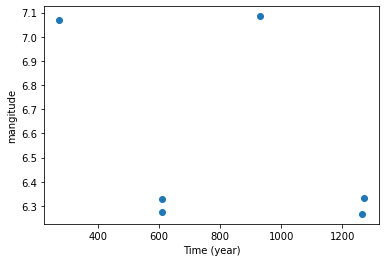

In [4]:
#MT plot
jobid=0
dd=np.loadtxt('event'+str(jobid)+'.dat')
yr=365*24*3600
plt.scatter(dd[:,2]/yr,dd[:,3])
#plt.xlim([400,500])
plt.xlabel('Time (year)')
plt.ylabel('mangitude')

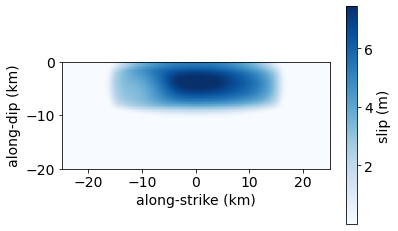

In [7]:
#slip per event
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation


jobid=201
nr=4 #number of output file = sqrt(number of MPI processes)
imax=100
jmax=40

k=3 #slip distribution for the 3rd earthquake

n=imax*jmax
ds=0.5
xmin=-imax/2*ds
xmax=imax/2*ds
ymin=-jmax*ds
ymax=0

d=np.zeros(n)
for rank in range(nr):
    ary1=np.loadtxt('ind'+ str(jobid) +'_'+str(rank)+'.dat',dtype="int32")
    nc=len(ary1)
    
    fp = open('EQslip'+ str(jobid) +'_'+str(rank)+'.dat','rb')
    ary2 = np.fromfile(fp, np.float64, -1)
    fp.close()
    for i in range(nc):
        ind=ary1[i]
        d[ind-1]=ary2[i+k*nc]
#np.savetxt('tmp',vel)
d=d.reshape(imax,jmax)
d=d.transpose()

plt.rcParams['image.cmap'] ='Blues'
plt.rcParams['font.size'] = 14
plt.axes().set_aspect('equal')
plt.xlabel('along-strike (km)')
plt.ylabel('along-dip (km)')
plt.imshow(d,extent=(xmin,xmax,ymin,ymax))
plt.colorbar(label='slip (m)')
#plt.savefig('../figs/slip'+str(k)+'.png',dpi=300)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


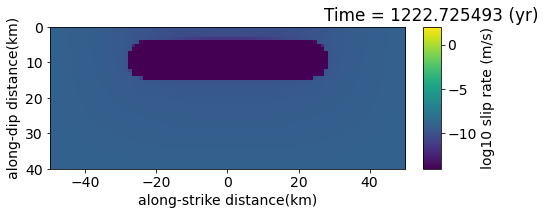

In [8]:
#making animation for slip rate evolution (example for bp5r)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

job=201
yr=365*24*3600
dd=np.loadtxt('monitor'+str(job)+'.dat')
nta=int(len(dd))
time=np.zeros(nta)
for i in range(nta):
    time[i]=dd[i,1]/yr

imax=100
jmax=40
ncell=imax*jmax
ds=0.5
xmin=-imax/2*ds
xmax=imax/2*ds
ymin=0.0
ymax=jmax*ds

nr=4
nstart=0 
nt=50 #animation steps

d=np.zeros([nt,ncell])

for rank in range(nr):
    # fp = open('ind'+ str(job) +'_'+str(rank)+'.dat','rb')
    # ary1 = np.fromfile(fp, np.int32, -1)
    # fp.close()
    # nc=len(ary1)
    # print(nc)
    ary1=np.loadtxt('ind'+ str(job) +'_'+str(rank)+'.dat',dtype="int32")
    nc=len(ary1)
    #print(nc)
    
    fp = open('vel'+ str(job) +'_'+str(rank)+'.dat','rb')
    ary2 = np.fromfile(fp, np.float64, -1)
    fp.close()
    for n in range(nc):
        ind=ary1[n]
        for k in range(nt):
            d[k,ind-1]=ary2[n+(k+nstart)*nc]

# print(d.shape)
# d=d.reshape(nt,500,200)
# d=d.transpose()

# x = np.linspace(xmin, xmax, imax)
# y = np.linspace(ymin, ymax, jmax)
# X,Y = np.meshgrid(x,y)

plt.rcParams['image.cmap'] ='viridis'
fig, ax = plt.subplots(figsize=(7,5))
ax.set_xlabel("along-strike distance(km)")
ax.set_ylabel("along-dip distance(km)")
#fig.colorbar(cax,label='log10 slip rate(m/s)')
ax.set_aspect('equal')
#plt.colorbar(label="log10 slip rate (m/s)")
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', '5%', '5%')
def animate(i):
    print(i)
    #cax.set_array(d[i,:,:].flatten())
    d2=np.log10(d[i,:])
    d2=d2.reshape(imax,jmax)
    d2=d2.transpose()
    #print(d2.shape,X.shape,Y.shape)
    #ax.pcolormesh(X, -Y, np.log10(d2), vmin=-14, vmax=2)
    im=ax.imshow(d2, vmin=-12, vmax=0,extent=(xmin,xmax,ymax,ymin))
    plt.title('Time = %f (yr)' %time[(nstart+i)*100])
    fig.colorbar(im, cax=cax, label="log10 slip rate (m/s)")
    #ax.pcolormesh(X, -Y, d2, vmin=20, vmax=40)


anim = animation.FuncAnimation(fig, animate, interval=100, frames=nt)
writervideo = animation.FFMpegWriter(fps=20)
anim.save('vel'+str(job)+'.mp4',writer=writervideo,dpi=300)

plt.show()